# Gaussian Naive Bayes Classifier
In this experiment, we use Gaussian Naive Bayes (GNB) to classify varieties of the Iris dataset.

In [31]:
import pandas as pd
import torch
import numpy as np
import math
import matplotlib.pyplot as plt

In order to access the dataset, you may download it from the following [link](https://gist.github.com/netj/8836201) or load it from [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris).

In [32]:
df = pd.read_csv('Datasets/iris.csv')
with pd.option_context('display.max_rows', None):
    display(df)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


Similar to the previous experiments, we will assign Setosa to class $0$, Versicolor to class $1$, and Virginica to class $2$.

In [33]:
df.loc[df["variety"] == "Setosa", "variety"] = 0 # Change Setosa to class 0
df.loc[df["variety"] == "Versicolor", "variety"] = 1 # Change Versicolor to class 1
df.loc[df["variety"] == "Virginica", "variety"] = 2 # Change Virginica to class 2

We now split our dataset into the train, test, and validation sets. Like the [K-Nearest Neighbors](https://github.com/davidpiscasio/machine-learning/blob/main/KNN/knn.ipynb) experiment, we will only use petal length and petal width as our features. Moreover, the train set consists of 40 samples per class (120 samples in total), the test set consists of 9 samples per class (27 samples in total), and the validation set consists of 1 sample per class (3 samples in total).

In [34]:
x0 = torch.tensor(df.iloc[0:,2].values, dtype=torch.float32) # Petal length
x0_train = torch.cat((x0[:40], x0[50:90], x0[100:140]))
x0_test = torch.cat((x0[40:49], x0[90:99], x0[140:149]))
x0_valid = torch.tensor([x0[49],x0[99],x0[149]])

x1 = torch.tensor(df.iloc[0:,3].values, dtype=torch.float32) # Petal width
x1_train = torch.cat((x1[:40], x1[50:90], x1[100:140]))
x1_test = torch.cat((x1[40:49], x1[90:99], x1[140:149]))
x1_valid = torch.tensor([x1[49],x1[99],x1[149]])

y = torch.tensor(df.iloc[0:,4].values.astype(np.uint8), dtype=torch.uint8) # Variety
y_train = torch.cat((y[:40], y[50:90], y[100:140]))
y_test = torch.cat((y[40:49], y[90:99], y[140:149]))
y_valid = torch.tensor([y[49],y[99],y[149]])

We construct the Gaussian Naive Bayes classifier model. We used the following [[1](https://www.youtube.com/watch?v=H3EjCKtlVog), [2](https://towardsdatascience.com/if-you-are-a-bayesian-you-have-to-be-naive-ac55492889bf)] as reference to our model. The $gaussian$ function returns the probability density of the normal distribution given the mean ($\mu$) and standard deviation ($\sigma$). The $get\_features$ function computes for the prior probabilities of each class and divides the indices into their respective classes. $fit$ computes for the respective $\mu$ and $\sigma$ of each feature given each class for the likelihood calculations. It is important to note that since we use the model as a classifier, we do not need to divide the posterior "probability" by the prior probability that the evidence is true. However, we will get the natural logarithim ($log_{e}$) of the whole "score" to prevent underflow as discussed in [[1](https://www.youtube.com/watch?v=H3EjCKtlVog)].

In [35]:
class GaussianNB():
    def __init__(self, x0, x1, y):
        self.x0 = x0
        self.x1 = x1
        self.y = y
        self.num_classes = len(list(torch.unique(self.y)))
        self.probs = torch.ones(self.num_classes) / self.num_classes
        self.class_idx = [[] for _ in range(self.num_classes)]
        self.means = torch.zeros((self.num_classes, 2))
        self.stds = torch.zeros((self.num_classes, 2))

    # x must be a tensor (even if it is a single element)
    def gaussian(self, x, mean, std):
        x = torch.tensor(x) if not torch.is_tensor(x) else x
        return torch.exp(((x-mean)/std)**2/-2)/(std*((2*math.pi)**0.5))
    
    def get_features(self):
        temp_probs = torch.zeros(self.num_classes)
        num_samples = len(list(self.y))
        for i, data in enumerate(y):
            temp_probs[data.item()] += 1
            self.class_idx[data.item()].append(i)
        self.probs = temp_probs / num_samples
        self.class_idx = torch.tensor(self.class_idx)

    def fit(self):
        self.get_features()
        for c in range(self.num_classes):
            self.stds[c, 0], self.means[c, 0] = torch.std_mean(torch.index_select(x0, 0, self.class_idx[c]))
            self.stds[c, 1], self.means[c, 1] = torch.std_mean(torch.index_select(x1, 0, self.class_idx[c]))
    
    def test(self, x0_test, x1_test, y_test, log=False):
        acc = 0.
        for i in range(len(list(x0_test))):
            scores = torch.zeros(self.num_classes)
            for c in range(self.num_classes):
                scores[c] = torch.log(self.probs[c] * self.gaussian(x0_test[i], self.means[c, 0], self.stds[c, 0]) * self.gaussian(x1_test[i], self.means[c, 1], self.stds[c, 1]))
            pred = torch.argmax(scores)
            acc = acc + 1. if pred == y_test[i] else acc
            if log == True:
                print(f'Pred: {pred} | Actual: {y_test[i]}')
        acc = acc / len(list(x0_test))
        if log == True:
            print(f'\nTest accuracy: {acc*100.}%')
        return acc

    def predict(self, _x0, _x1):
        scores = torch.zeros(self.num_classes)
        for c in range(self.num_classes):
            scores[c] = torch.log(self.probs[c] * self.gaussian(_x0, self.means[c, 0], self.stds[c, 0]) * self.gaussian(_x1, self.means[c, 1], self.stds[c, 1]))
        pred = torch.argmax(scores)
        return pred
    
    def _means(self):
        return self.means
    
    def _stds(self):
        return self.stds

Now, we test the model to see if it correctly classifies the test dataset. Upon looking at the results of the test, we see that the Gaussian Naive Bayes model correctly predicts the variety of each sample as it peformed with a $100\%$ test accuracy.

In [36]:
if __name__ == '__main__':
    gnb = GaussianNB(x0_train, x1_train, y_train)
    gnb.fit()
    def shuffle_data(x,i): return x[i].view(x.size())
    i = torch.randperm(x0_test.shape[0])
    x0_test = shuffle_data(x0_test,i)
    x1_test = shuffle_data(x1_test,i)
    y_test = shuffle_data(y_test,i)
    gnb.test(x0_test, x1_test, y_test, log=True)

Pred: 2 | Actual: 2
Pred: 1 | Actual: 1
Pred: 0 | Actual: 0
Pred: 2 | Actual: 2
Pred: 2 | Actual: 2
Pred: 2 | Actual: 2
Pred: 1 | Actual: 1
Pred: 1 | Actual: 1
Pred: 1 | Actual: 1
Pred: 0 | Actual: 0
Pred: 2 | Actual: 2
Pred: 1 | Actual: 1
Pred: 1 | Actual: 1
Pred: 0 | Actual: 0
Pred: 2 | Actual: 2
Pred: 1 | Actual: 1
Pred: 0 | Actual: 0
Pred: 1 | Actual: 1
Pred: 2 | Actual: 2
Pred: 0 | Actual: 0
Pred: 2 | Actual: 2
Pred: 0 | Actual: 0
Pred: 0 | Actual: 0
Pred: 1 | Actual: 1
Pred: 2 | Actual: 2
Pred: 0 | Actual: 0
Pred: 0 | Actual: 0

Test accuracy: 100.0%


To better visualize the Gaussian Naive Bayes classifier, we have plotted the normal distributions of each feature of each class, along with the predictions of the model to our validation set. We observe that the model also correctly predicts the validation data.

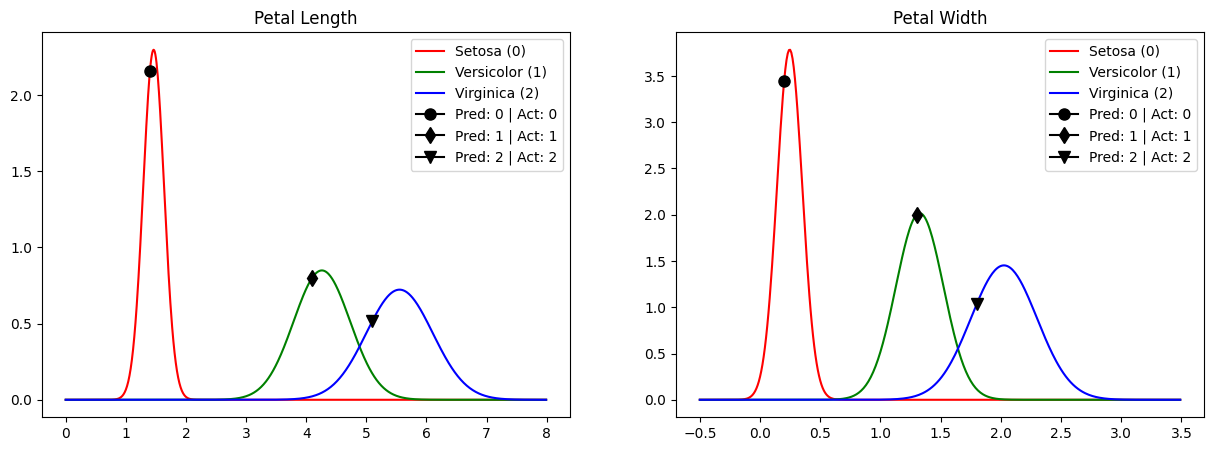

In [37]:
fig = plt.figure(figsize=(15, 5))
rows = 1
columns = 2

x0_range = torch.arange(0, 8, 0.01)
x1_range = torch.arange(-.5, 3.5, 0.01)

fig.add_subplot(rows, columns, 1)
plt.plot(x0_range, gnb.gaussian(x=x0_range, mean=gnb._means()[0,0], std=gnb._stds()[0,0]), label='Setosa (0)', color='red')
plt.plot(x0_range, gnb.gaussian(x=x0_range, mean=gnb._means()[1,0], std=gnb._stds()[1,0]), label='Versicolor (1)', color='green')
plt.plot(x0_range, gnb.gaussian(x=x0_range, mean=gnb._means()[2,0], std=gnb._stds()[2,0]), label='Virginica (2)', color='blue')
plt.plot(x0_valid[0], gnb.gaussian(x=x0_valid[0], mean=gnb._means()[0,0], std=gnb._stds()[0,0]), marker='o', markersize=8, color='black',
        label=f'Pred: {gnb.predict(x0_valid[0], x1_valid[0])} | Act: {y_valid[0]}')
plt.plot(x0_valid[1], gnb.gaussian(x=x0_valid[1], mean=gnb._means()[1,0], std=gnb._stds()[1,0]), marker='d', markersize=8, color='black',
        label=f'Pred: {gnb.predict(x0_valid[1], x1_valid[1])} | Act: {y_valid[1]}')
plt.plot(x0_valid[2], gnb.gaussian(x=x0_valid[2], mean=gnb._means()[2,0], std=gnb._stds()[2,0]), marker='v', markersize=8, color='black',
        label=f'Pred: {gnb.predict(x0_valid[2], x1_valid[2])} | Act: {y_valid[2]}')
plt.title("Petal Length")
plt.legend()

fig.add_subplot(rows, columns, 2)
plt.plot(x1_range, gnb.gaussian(x=x1_range, mean=gnb._means()[0,1], std=gnb._stds()[0,1]), label='Setosa (0)', color='red')
plt.plot(x1_range, gnb.gaussian(x=x1_range, mean=gnb._means()[1,1], std=gnb._stds()[1,1]), label='Versicolor (1)', color='green')
plt.plot(x1_range, gnb.gaussian(x=x1_range, mean=gnb._means()[2,1], std=gnb._stds()[2,1]), label='Virginica (2)', color='blue')
plt.plot(x1_valid[0], gnb.gaussian(x=x1_valid[0], mean=gnb._means()[0,1], std=gnb._stds()[0,1]), marker='o', markersize=8, color='black', 
        label=f'Pred: {gnb.predict(x0_valid[0], x1_valid[0])} | Act: {y_valid[0]}')
plt.plot(x1_valid[1], gnb.gaussian(x=x1_valid[1], mean=gnb._means()[1,1], std=gnb._stds()[1,1]), marker='d', markersize=8, color='black',
        label=f'Pred: {gnb.predict(x0_valid[1], x1_valid[1])} | Act: {y_valid[1]}')
plt.plot(x1_valid[2], gnb.gaussian(x=x1_valid[2], mean=gnb._means()[2,1], std=gnb._stds()[2,1]), marker='v', markersize=8, color='black',
        label=f'Pred: {gnb.predict(x0_valid[2], x1_valid[2])} | Act: {y_valid[2]}')
plt.title("Petal Width")
plt.legend()

plt.show()

Moreover, we observe that the curve for the Setosa class is taller and narrower than the other two classes, which is expected since it has the smallest standard deviation among all classes for both features.

In [38]:
print(f'Means:\n\t{gnb._means()}')
print(f'Standard Deviations:\n\t{gnb._stds()}')

Means:
	tensor([[1.4620, 0.2460],
        [4.2600, 1.3260],
        [5.5520, 2.0260]])
Standard Deviations:
	tensor([[0.1737, 0.1054],
        [0.4699, 0.1978],
        [0.5519, 0.2747]])
